In [190]:
import pandas as pd
import numpy as np
import scipy as sp
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import nbimporter
from sharpe_portfolio_optimisation import MeanVarianceOptimisation

In [191]:
portfolioTickers = ['VUAG', 'VUKG', 'VMIG', 'VHYG', 'VERG', 'VFEG', 'VJPB']
portfolioTickers = [ticker + '.L' for ticker in portfolioTickers]

benchmarkTicker = 'VWRP.L'

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(3*365)

portfolioDf = yf.download(portfolioTickers,start=startDate,end=endDate,interval='1d')
portfolioDf = portfolioDf['Adj Close']

benchmarkDf = yf.download(benchmarkTicker,start=startDate,end=endDate)
benchmarkDf = benchmarkDf['Adj Close']

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


In [192]:
portfolioDf.describe()

Ticker,VERG.L,VFEG.L,VHYG.L,VJPB.L,VMIG.L,VUAG.L,VUKG.L
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,34.226303,44.772265,50.740446,22.909374,32.058937,67.101376,34.569938
std,3.171754,2.139202,3.346693,1.844950,2.605404,7.671485,3.678685
min,27.887501,39.907501,45.165001,19.722000,26.001450,55.000000,28.521040
25%,31.623125,43.097500,48.367499,21.406250,30.209472,61.408750,31.315694
50%,34.150000,44.306250,49.821249,22.593750,31.402124,64.137501,34.499418
75%,36.554998,46.406874,52.477501,24.589375,33.892330,72.506248,36.357317
max,40.222500,51.974998,58.924999,26.940001,38.045677,85.480003,42.410000


In [193]:
benchmarkDf.describe()

count    756.000000
mean      88.881184
std        8.098368
min       75.300003
25%       82.974998
50%       86.092503
75%       94.001249
max      108.040001
Name: Adj Close, dtype: float64

In [194]:
portfolioDf.dropna(inplace=True)
benchmarkDf.dropna(inplace=True)
portfolioCorrMatrix = portfolioDf.corr()

Text(0.5, 1.0, '3-year Portfolio Correlation Matrix')

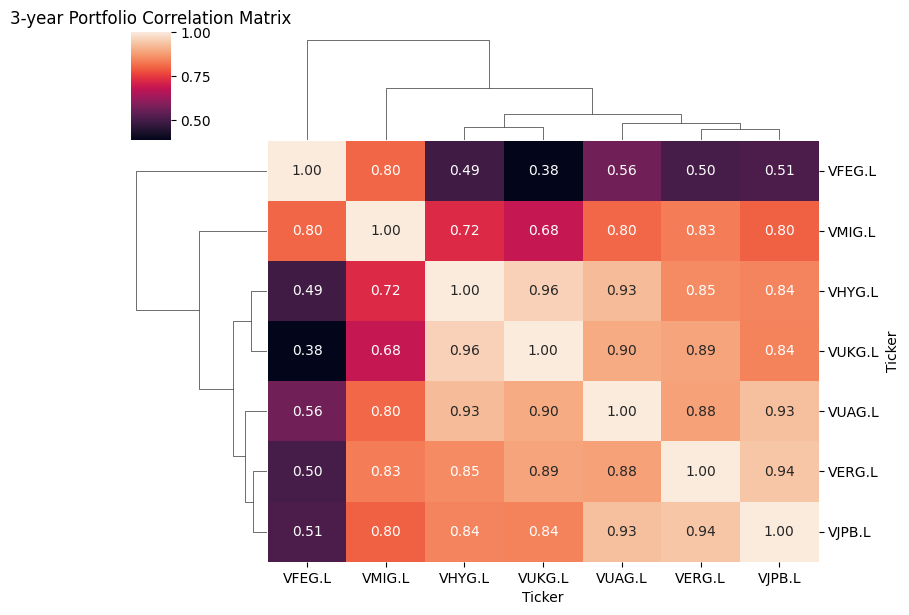

In [195]:
sns.clustermap(portfolioCorrMatrix, annot=True, fmt=".2f", figsize=(8,6))
plt.title('3-year Portfolio Correlation Matrix')

[                       0%                       ]

[*********************100%***********************]  7 of 7 completed


Text(0.5, 1.0, '2-month COVID-19 Risk-On Correlation Matrix')

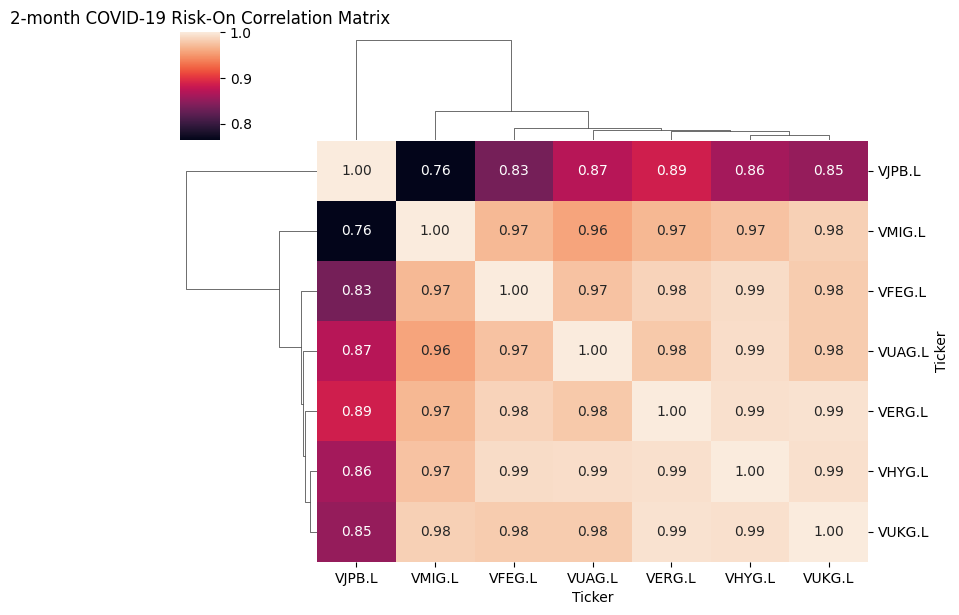

In [196]:
riskOnDf = yf.download(portfolioTickers, start=dt.datetime(year=2020,month=2,day=14), end=dt.datetime(year=2020,month=4,day=14))
riskOnDf = riskOnDf['Adj Close']
riskOnDf.dropna(inplace=True)

riskOnCorr = riskOnDf.corr()
sns.clustermap(riskOnCorr, annot=True, fmt=".2f", figsize=(8,6))
plt.title('2-month COVID-19 Risk-On Correlation Matrix')


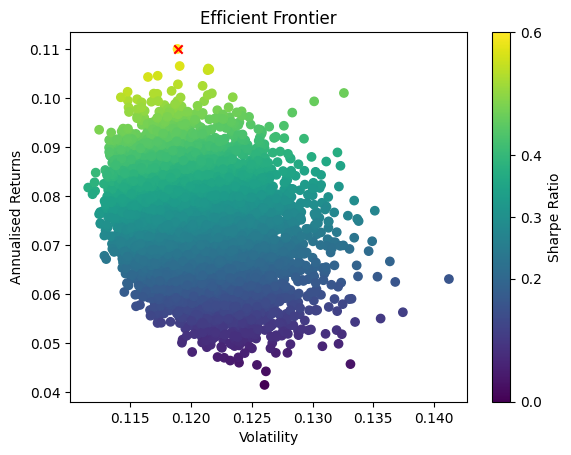

In [197]:
optimised = MeanVarianceOptimisation(portfolioDf.pct_change().dropna())
optimised.generatePortfolios()
optimised.plot()

In [198]:
optimised.getWeights()

VERG.L: 2.2%
VFEG.L: 5.6%
VHYG.L: 14.1%
VJPB.L: 0.3%
VMIG.L: 4.0%
VUAG.L: 26.6%
VUKG.L: 47.1%


Implement style-based portfolio analysis: small/large cap value and growth indices required